# 物价水平历史

本讲座提供了一些关于总价格指数水平波动的历史证据。

让我们首先安装必要的 Python 包。

In [1]:
!pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


图像输入能力：启用

我们可以导入将要使用的 Python 模块。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


价格水平的增长率在通俗媒体和央行官员及财政官员的讨论中被称为**通货膨胀**。

价格水平以国内货币单位为代表的消费品捆绑单位来衡量。

因此，在美国，时间$t$的价格水平以美元（月$t$或年$t$）每单位消费捆绑来衡量。

直到20世纪初，在许多西方经济中，价格水平年复一年地波动，但没有太大的趋势。

价格水平通常在一个世纪结束时接近它们在世纪初开始的地方。

20世纪的情况不同，如我们将在本讲座中看到的。

一个被广泛相信的解释是，国家在20世纪初放弃了金银标准。

```{tip}
本讲座为后续一些宏观经济学家用来思考价格水平决定因素的理论，如{doc}`cagan_ree` 和 {doc}`cagan_adaptive`，奠定了基础。
```

## 四个世纪的价格水平

我们首先展示最初出现在{sargent2002big}第35页的数据，该数据展示了1600年至1914年四个“硬通货”国家的价格水平。

* 法国 
* 西班牙（卡斯提尔）
* 英国
* 美国

在当前语境中，“硬通货”一词是指这些国家采用商品货币标准：货币由金银硬币构成，其流通价值主要由其金银含量的重量决定。

```{note}
在金银标准下，有些货币也由代表金银硬币纸质仓库凭证构成。政府或私人银行发行的银行券可以被视为这种“仓库凭证”的例子。
```

让我们从[github](https://github.com/QuantEcon/lecture-python-intro/tree/main/lectures/datasets)托管的电子表格中将数据导入pandas。

In [3]:
# 导入数据并清理索引
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/longprices.xls"
df_fig5 = pd.read_excel(data_url, 
                        sheet_name='all', 
                        header=2, 
                        index_col=0).iloc[1:]
df_fig5.index = df_fig5.index.astype(int)

我们首先绘制价格水平在1600-1914年间的变化情况。

在这个时间间隔的多数年份，国家采用的是金本位或银本位。

/tmp/ipykernel_3476317/2151162473.py:16: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3476317/2151162473.py:16: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  plt.tight_layout()
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


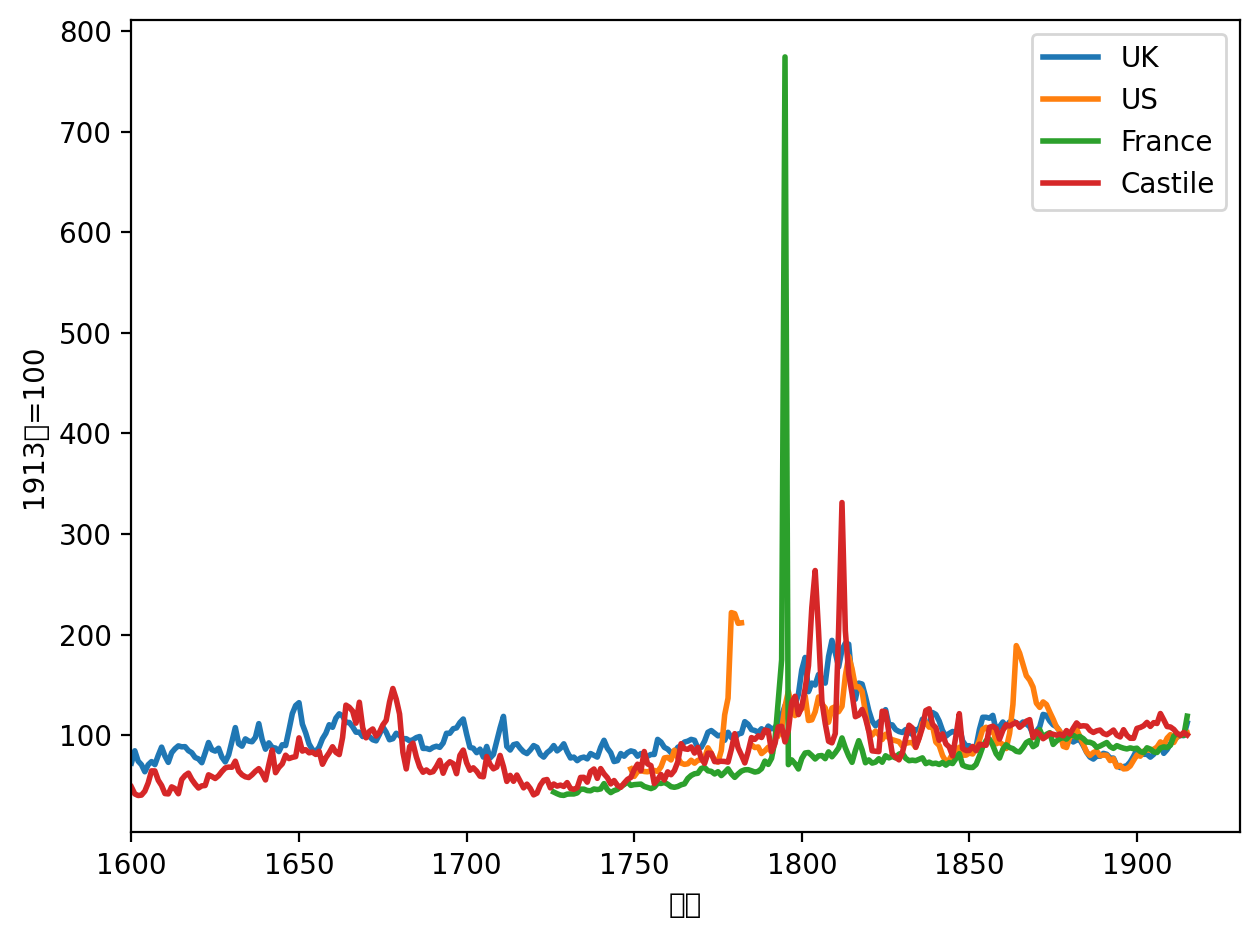

In [4]:
df_fig5_bef1914 = df_fig5[df_fig5.index <= 1915]

# 创建图表
cols = ['UK', 'US', 'France', 'Castile']

fig, ax = plt.subplots(dpi=200)

for col in cols:
    ax.plot(df_fig5_bef1914.index, 
            df_fig5_bef1914[col], label=col, lw=2)

ax.legend()
ax.set_ylabel('1913年=100')
ax.set_xlabel('年份')
ax.set_xlim(xmin=1600)
plt.tight_layout()
plt.show()

我们说“大多数年份”是因为在某些年份，国家暂时脱离了金本位或银本位。

仔细观察{numref}`lrpl`，你可能猜到这些暂时脱离的时期，因为它们也是物价水平暂时显著上升的时期：

* 1791-1797年在法国（法国大革命）
* 1776-1790年在美国（脱离英国独立战争）
* 1861-1865年在美国（南北战争）

在这些时期，政府为了支付战争开支，暂时放弃了金银本位并印刷纸币。

尽管有这些暂时的脱离，图中一个显著的特点是，三个世纪以来物价水平大致是恒定的。

在早期世纪中，这些数据的两个特征引起了耶鲁大学的[欧文·费希尔](https://en.wikipedia.org/wiki/Irving_Fisher)和剑桥大学的[约翰·梅纳德·凯恩斯](https://en.wikipedia.org/wiki/John_Maynard_Keynes)的注意：

* 尽管在长期跨度中价格水平被锚定在相同的平均水平上，但价格水平存在显著的年际变化
* 使用贵重的金银作为硬币虽然成功地通过限制货币供应来锚定价格水平，但也耗费了实际资源
* 一个国家为使用金银硬币作为货币支付了高昂的“机会成本”——这些黄金和白银本可以被制成有价值的珠宝和其他耐用商品

凯恩斯和费希尔提出了一种他们声称更有效的方式来实现价格水平

* 至少像金银本位一样牢固地锚定，并且
* 年度短期波动较小

他们说，中央银行可以通过以下方式实现价格水平稳定：

* 发行**有限供应**的纸币
* 拒绝印钞来资助政府支出

这一逻辑促使约翰·梅纳德·凯恩斯称商品标准为“野蛮遗迹”。

一种纸币或“法定货币”系统取消了货币背后的所有储备。

但坚持金银本位提供了一种自动机制来限制货币供应，从而锚定了价格水平。

要锚定价格水平，纯纸币或法定货币系统用一个拥有权威和决心限制货币供应（并威慑伪造者！）的中央银行取代了这种自动机制。

现在让我们看看1914年之后，这四个国家的价格水平变化，显示最初出现在{sargent2002big}第35页的完整图表。

{numref}`lrpl_lg`显示了1600年至2000年四个“硬通货”国家价格水平的对数。

```{note}
虽然我们在早期停于1914年的图表中不需要用对数，但我们现在选择使用对数，因为我们希望在同一个图表中拟合1914年之后的观察结果与之前的观察结果。
```
```

```{code-cell} ipython3
---
mystnb:
  figure:
    caption: "价格水平的长期时间序列（对数）"
    name: lrpl_lg
---
fig, ax = plt.subplots(dpi=200)

for col in cols:
    ax.plot(df_fig5.index, df_fig5[col], lw=2)
    ax.text(x=df_fig5.index[-1]+2, 
            y=df_fig5[col].iloc[-1], s=col)

ax.set_yscale('log')
ax.set_ylabel('1913年=100')
ax.set_ylim([10, 1e6])
ax.set_xlabel('价格水平的对数')
ax.set_xlim(xmin=1600)
plt.tight_layout()
plt.show()
```

在1914年大战争爆发后，这四个国家离开了金本位，从而获得了印钞来资助政府支出的能力。

{numref}`lrpl_lg`表明，在锚定价格水平方面，使用纸币印刷的央行未能像金本位和标准银本位那样表现出色。

这可能会让欧文·费雪和约翰·梅纳德·凯恩斯感到惊讶或失望。

实际上，早期的经济学家和政治家在20世纪初，早在凯恩斯和费雪倡导他们之前，就知道法定货币系统的可能性。

商品货币体系的支持者不信任政府和央行能妥善管理法定货币系统。

他们愿意支付建立和维护商品货币系统的资源成本。

鉴于许多国家在20世纪放弃商品货币后经历的高通胀和持续通胀，我们不急于批评那些提倡金银标准的支持者，理解他们为什么偏好维持1914年之前的金/银标准。

在二十世纪纸币标准下，经历的通货膨胀广度和长度在历史上是前所未有的。

## 四大通胀

第一次世界大战于1918年11月结束后，货币和财政当局在没有金银标准的情况下，努力实现价格水平的稳定。

我们展示四个来自《四大通胀结束》{cite}`sargent2013rational` 第三章的图表。

这些图表描绘了四个国家在第一次世界大战后早期的价格水平对数变化：

* 图3.1，奥地利零售价格，1921-1924年（第42页）
* 图3.2，匈牙利批发价格，1921-1924年（第43页）
* 图3.3，波兰批发价格，1921-1924年（第44页）
* 图3.4，德国批发价格，1919-1924年（第45页）

我们已经在第三章的四个图表中添加了与美元的汇率对数变化
来自{sargent2013rational}。

支持我们图表的数据出现在{sargent2013rational} 第三章附录的表格中。
我们已经将所有这些数据录入一个电子表格 {download}`chapter_3.xlsx <https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx>` 并读取到 pandas 中。

在下面的代码单元中，我们清理数据并构建一个 `pandas.dataframe`。

In [5]:
def process_entry(entry):
    "清理数据框中的每个条目。"
    
    if type(entry) == str:
        # 去掉前后空格
        entry = entry.strip()
        # 去掉逗号
        entry = entry.replace(',', '')
    
        # 去掉 HTML 标记
        item_to_remove = ['<s>a</s>', '<s>c</s>', 
                          '<s>d</s>', '<s>e</s>']

        # <s>b</s> 表示十亿
        if '<s>b</s>' 在 entry 中:
            entry = entry.replace('<s>b</s>', '')
            entry = float(entry) * 1e9
        else:
            for item in item_to_remove:
                if item 在 entry 中:
                    entry = entry.replace(item, '')
    return entry

def process_df(df):
    "清理并重组整个数据框。"
    
    # 去掉列名中的 HTML 标记
    for item in ['<s>a</s>', '<s>c</s>', '<s>d</s>', '<s>e</s>']:
        df.columns = df.columns.str.replace(item, '')
        
    # 将年份转换为整数
    df['Year'] = df['Year'].apply(lambda x: int(x))
    
    # 设置索引为年份和月份的日期时间格式
    df = df.set_index(
            pd.to_datetime(
                (df['Year'].astype(str) + \
                 df['Month'].astype(str)), 
                format='%Y%B'))
    df = df.drop(['Year', 'Month'], axis=1)
    
    # 处理重复条目，保留第一个
    df = df[~df.index.duplicated(keep='first')]
    
    # 将属性值转换为数值
    df = df.applymap(lambda x: float(x) \
                if x != '—' else np.nan)
    
    # 最后，我们只关注1919年至1925年之间的数据
    mask = (df.index >= '1919-01-01') & \
           (df.index < '1925-01-01')
    df = df.loc[mask]

    return df

SyntaxError: invalid syntax (592272705.py, line 15)

我们将数据读取为pandas数据帧。

In [ ]:
data_fp = 'https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx'

xls = pd.ExcelFile(data_fp)

chap3_worksheets = {}

for sheet in xls.sheet_names:
    df = pd.read_excel(data_fp, sheet)
    chap3_worksheets[sheet] = df.applymap(process_entry)
    
# 四个国家/地区的工作表数据，进入后会分别应用上述的清理函数
df_germany = process_df(chap3_worksheets['Germany'])
df_poland = process_df(chap3_worksheets['Poland'])
df_hungary = process_df(chap3_worksheets['Hungary'])
df_austria = process_df(chap3_worksheets['Austria'])

我们创建作图函数 `pe_plot` 和 `pr_plot`，生成显示每个选定国家的价格水平、汇率和通货膨胀率的图形。

In [ ]:
def pe_plot(p_seq, e_seq, index, labs, ax):
    "生成价格和汇率的图形。"

    p_lab, e_lab = labs
    
    # 绘制价格和汇率
    ax.plot(index, p_seq, label=p_lab, color='tab:blue', lw=2)
    
    # 添加新坐标轴
    ax1 = ax.twinx()
    ax1.plot([None], [None], label=p_lab, color='tab:blue', lw=2)
    ax1.plot(index, e_seq, label=e_lab, color='tab:orange', lw=2)
    
    # 设置对数坐标轴
    ax.set_yscale('log')
    ax1.set_yscale('log')
    
    # 定义坐标轴标签格式
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    # 设置标签
    ax.set_ylabel('价格水平')
    ax1.set_ylabel('汇率')
  
    ax1.legend(loc='upper left')
    
    return ax1

def pr_plot(p_seq, index, ax):
    "生成通胀率的图形。"

    # 计算 log p_seq 的差异
    log_diff_p = np.diff(np.log(p_seq))
    
    # log p_seq 差异的图表
    ax.scatter(index[1:], log_diff_p, 
               label='每月通胀率', 
               color='tab:grey')
    
    # 计算并绘制移动平均
    diff_smooth = pd.DataFrame(log_diff_p).rolling(3, center=True).mean()
    ax.plot(index[1:], diff_smooth, label='移动平均（3期）', alpha=0.5, lw=2)
    ax.set_ylabel('通胀率')
    
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    ax.legend(loc='upper left')
    
    return ax

让我们绘制奥地利、匈牙利、波兰和德国在1920年代的价格和汇率。

### 奥地利

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, dpi=200)

# 设置图像尺寸
fig.set_size_inches(9, 9)

# 绘制价格和汇率图表
ax1 = pe_plot(df_austria['P'], 
              df_austria['E'], 
              df_austria.index, 
              ['价格水平', '汇率'], 
              axs[0])

# 绘制通胀率图表
ax2 = pr_plot(df_austria['P'], 
              df_austria.index, 
              axs[1])

plt.tight_layout()
plt.show()

### 匈牙利

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, dpi=200)
fig.set_size_inches(9, 9)

# 绘制价格和汇率图表
ax1 = pe_plot(df_hungary['P'], 
              df_hungary['E'], 
              df_hungary.index, 
              ['价格水平', '汇率'], 
              axs[0])

# 绘制通胀率图表
ax2 = pr_plot(df_hungary['P'], 
              df_hungary.index, 
              axs[1])

plt.tight_layout()
plt.show()

### 波兰

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, dpi=200)
fig.set_size_inches(9, 9)

# 绘制价格和汇率图表
ax1 = pe_plot(df_poland['P'], 
              df_poland['E'], 
              df_poland.index, 
              ['价格水平','汇率'], 
              axs[0])

# 绘制通胀率图表
ax2 = pr_plot(df_poland['P'], 
              df_poland.index, 
              axs[1])

plt.tight_layout()
plt.show()

### 德国

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, dpi=200)
fig.set_size_inches(9, 9)

# 绘制价格和汇率图表
ax1 = pe_plot(df_germany['P'], 
              df_germany['E'], 
              df_germany.index, 
              ['价格水平', '汇率'], 
              axs[0])

# 绘制通胀率图表
ax2 = pr_plot(df_germany['P'], 
              df_germany.index, 
              axs[1])

plt.tight_layout()
plt.show()

### 分析

上下两行图表分别显示:

- **第一行**: 对数的价格水平(P)和对数的美元交换率(E)。  第二行右手标尺是对数的价格水平尺度， 左手标尺是对数的美元交换率(E) 的尺度。
  
- **第二行**: 用户定义窗口的通胀率滑动平均。 默认窗口为3个月。 

让我们来总结观察到的主要模式:

- 四个国家在1920年代初期的价格水平呈指数增长。
- 通胀过程具有很高的波动性, 期间价格变化剧烈。
- 四个国家的价格水平在几个月间有显著变化, 这反映了极高的通货膨胀率。
  
这些历史事件在经济学中被称为**恶性通货膨胀**， 它们为央行和财政政策制定者引发了关于维护价格稳定的重要课程。

这些历史教训强调了货币和财政政策纪律在维护国家经济稳定中的必要性。

让我们再深入看一下奥地利的月度通胀率，我们将使用以后的技术来仔细观察这个过程。

### 奥地利月度通胀率

- 让我们看一下奥地利的移动平均通胀率

In [ ]:
# 绘制移动平均
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(df_austria['P'], 
            df_austria.index,
            ax)

plt.show()

这些分析是在比后面讨论的更短时间窗口内进行的。明智的移动估算显示了一个价格不稳定且高波动性的时期。

接下来，我们将讨论有关具体事件和政策的案例研究。

通过观察 {numref}`pi_xrate_austria` 和 {numref}`inflationrate_austria`，本讲座的作者注意到以下几点：

* 一个“恶性通货膨胀”的时期，其特征是价格水平对数迅速上升和极高的月度通货膨胀率
* 恶性通货膨胀的突然停止，如价格水平对数的急剧变平和三个月平均通货膨胀率显著持久下降所示
* 美元汇率与价格水平同步变化

在我们现在要研究的接下来的三个案例中，我们将看到类似的模式。

### 匈牙利

我们获取的匈牙利数据来源于：

* 表3.10，价格水平 $\exp p$ 和汇率

In [ ]:
m_seq = df_Hung['Notes in circulation']
p_seq = df_Hung['Hungarian index of prices']
e_seq = 1 / df_Hung['Cents per crown in New York']

lab = ['匈牙利的价格指数', 
       '纽约的每克朗美分的倒数']

# 创建图表
fig, ax = plt.subplots(dpi=200)
_ = pe_plot(p_seq, e_seq, df_Hung.index, lab, ax)

plt.show()

### 波兰

我们获取的波兰数据来源于：

* 表3.11，价格水平 $\exp p$ 和汇率

### 德国

我们获取的德国数据来源于：

* 表3.5，价格水平 $\exp p$ 和汇率

在每种情况下，我们都将价格水平对数绘制在图中。

```
{code-cell} ipython3
---
mystnb:
  figure:
    caption: "月度通胀率（匈牙利）"
    name: inflationrate_hungary
---
# 绘制移动平均
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_Hung.index, ax)

plt.show()
```

{numref}`pi_xrate_hungary` 和 {numref}`inflationrate_hungary` 反映出匈牙利同样经历了价格指数和汇率的指数增长，以及显著的月度通胀率波动。

### 波兰

我们获取的波兰数据来源为：

* 表3.15，物价水平 $\exp p$
* 表3.15，汇率

```{note}
要从电子表格中的数据构建物价水平序列，我们指示 Pandas 遵循 {cite}`sargent2013rational` 第三章中实现的相同程序。我们将三个系列——批发价格指数、以纸币为计算基础的批发价格指数和以兹罗提为计算基础的批发价格指数拼接在一起。我们根据前一个系列可用最后一期的物价水平比率调整了序列，并将它们拼接在一起构建单个系列。我们在采用兹罗提后的1924年6月之后丢弃了汇率。因为我们没有以兹罗提为单位衡量的价格。我们使用1924年6月的旧货币来计算汇率调整。
```

In [ ]:
# 拼接三个不同单位的价格系列
p_seq1 = df_Pol['批发价格指数'].copy()
p_seq2 = df_Pol['批发价格指数: 以纸币为基础'].copy()
p_seq3 = df_Pol['批发价格指数: 以兹罗提为基础'].copy()

# 非nan部分
mask_1 = p_seq1[~p_seq1.isna()].index[-1]
mask_2 = p_seq2[~p_seq2.isna()].index[-2]

adj_ratio12 = (p_seq1[mask_1] / p_seq2[mask_1])
adj_ratio23 = (p_seq2[mask_2] / p_seq3[mask_2])

# 拼接三个系列
p_seq = pd.concat([p_seq1[:mask_1], 
                   adj_ratio12 * p_seq2[mask_1:mask_2], 
                   adj_ratio23 * p_seq3[mask_2:]])
p_seq = p_seq[~p_seq.index.duplicated(keep='first')]

# 汇率
e_seq = 1/df_Pol['每兹罗提美分（1924年5月后）']
e_seq[e_seq.index > '1924-05-01'] = np.nan

In [ ]:
# 创建图表
fig, ax = plt.subplots(dpi=200)
_ = pe_plot(p_seq, e_seq, df_Pol.index, ['价格指数', '汇率'], ax)

plt.show()

In [ ]:
# 创建图表
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_Pol.index, ax)

plt.show()

我们接下来将探索德国在一战后的恶性通胀时期的数据。

In [ ]:
# 读取德国数据
data_fp = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx"
xls = pd.ExcelFile('chapter_3.xlsx')
df_Ger = pd.read_excel(xls, sheet_name='Germany')
df_Ger = df_Ger.applymap(process_entry)

# 提取价格和汇率
p_seq = df_Ger['价格指数'].copy()
e_seq = df_Ger['美元汇率'].copy()
p_seq = p_seq[~p_seq.index.duplicated(keep='first')]
e_seq = e_seq[~e_seq.index.duplicated(keep='first')]

# 绘图
fig, ax = plt.subplots(dpi=200)
_ = pe_plot(p_seq, e_seq, df_Ger.index, ['价格指数', '汇率'], ax)

plt.show()

In [ ]:
# 创建图表
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_Ger.index, ax)

plt.show()

{numref}`pi_xrate_germany` 和 {numref}`inflationrate_germany` 再次验证了在恶性通胀期间，价格水平和汇率的对数迅速上升。尤其是在德国，通胀率剧烈波动，并在恶性通胀结束时迅速下降。这些模式在奥地利、匈牙利和波兰的恶性通胀期间也同样明显。

通过这些历史数据，我们看到，国家在放弃金银标准并转向纸币时，不再具备自动化限制货币供应的机制，导致了极端的价格不稳定。正如欧文·费雪和约翰·梅纳德·凯恩斯所预测的那样，尽管通过适当管理，法定货币系统可能实现价格水平的稳定，但在实际操作中，这种稳定性很难实现。然而，这并不意味着纸币系统必然失败。它强调了需要强有力的中央银行和财政纪律。

## 小结

我们回顾了多个国家在20世纪初期脱离金银标准后的恶性通胀时期。这些历史案例展示了纸币系统在缺乏有效管理下导致的极端价格不稳定。我们也看到，高度波动的月度通货膨胀率和价格水平的指数增长是恶性通胀的显著特征。通过了解这些历史教训，可以为当前和未来的货币和财政政策制定提供重要的指导。

```

```{code-cell} ipython3
---
mystnb:
  figure:
    caption: "价格指数（调整后）和汇率（德国）"
    name: piadj_xrate_germany
---
p_seq = df_Germ['Price index (on basis of marks before July 1924,'
                '  reichsmarks after)'].copy()
e_seq = 1/df_Germ['Cents per mark'].copy()

# 调整货币改革后的价格水平/汇率
p_seq[p_seq.index > '06-01-1924'] = p_seq[p_seq.index 
                                          > '06-01-1924'] * 1e12
e_seq[e_seq.index > '12-01-1923'] = e_seq[e_seq.index 
                                          > '12-01-1923'] * 1e12

lab = ['价格指数（马克或转换为马克）', 
       '1/每马克美分（或转换为马克的帝国马克）']

# 创建图表
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_Germ.index, lab, ax)

plt.show()
```

### 启动和停止恶性通胀

令人惊讶的是，奥地利、匈牙利、波兰和德国的（对数）价格水平在快速上升后如何迅速趋于平稳。

这些“突然停止”也体现在上图中的四个国家通胀三个月移动平均值的永久下降上。

此外，这四个国家的美元汇率与其价格水平阴影同步。

```{note}
这种模式是[购买力平价](https://en.wikipedia.org/wiki/Purchasing_power_parity)理论中的一种力的实例。
```

每个大规模的通胀似乎都“戛然而止”。

{sargent2002big} 第三章提供了对此显着模式的解释。

简而言之，以下是提供的解释。

第一次世界大战后，美国实行金本位制。

美国政府随时准备将美元兑换成规定数量的黄金。

第一次世界大战后，匈牙利、奥地利、波兰和德国没有实行金本位制。

他们的货币是“法币”或“无担保”，意味着没有可信的政府承诺将其兑换成黄金或银币。

政府印刷新纸币来支付商品和服务。

```{note}
从技术上讲，这些纸币主要由国库券支持。但人们无法预期这些国库券将通过征税来偿还，相反是通过印更多的纸币或国库券来偿还。
```

这种大规模行动导致这些货币的贬值达到惊人的程度。

最终，德国马克稳定在1万亿 ($10^{12}$) 纸币兑换为战前黄金马克的水平，波兰马克为180万纸币兑换为黄金兹罗提，奥地利克朗为14,400纸币兑换为战前奥匈帝国克朗，匈牙利克朗为14,500纸币兑换为战前奥匈帝国克朗。

{sargent2002big} 第三章描述了匈牙利、奥地利、波兰和德国为结束其恶性通胀而采取的故意政策变化。

各国政府停止印刷用于支付商品和服务的货币，并重新让其货币可兑换成美元或英镑。

{sargent2002big} 讲述的故事基于{doc}`cagan_ree` 和 {doc}`cagan_adaptive` 中描述的“货币主义价格水平理论”。

这些讲座讨论了那些迅速贬值的货币持有者的想法以及他们的信念如何在政府货币和财政政策的响应中塑造通胀。

### 小结

我们回顾了多个国家在20世纪初期脱离金银标准后的恶性通胀时期。这些历史案例展示了纸币系统在缺乏有效管理下导致的极端价格不稳定。我们也看到，高度波动的月度通货膨胀率和价格水平的指数增长是恶性通胀的显著特征。通过了解这些历史教训，可以为当前和未来的货币和财政政策制定提供重要的指导。